In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Alameda County Jury Panels ##

In [2]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


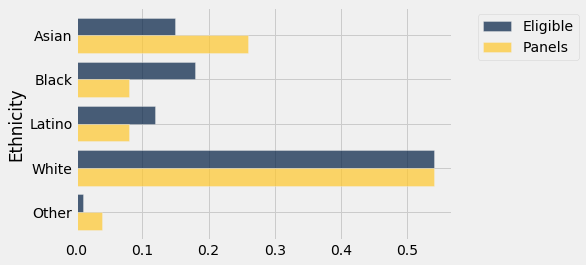

In [3]:
jury.barh("Ethnicity")

In [5]:
# Distribution of Races in the Eligible Juror Population
model = make_array(0.15, 0.18, 0.12, 0.54, 0.01)

In [6]:
# Distribution of jurors in a random sample from the above population
simulated = sample_proportions(1423, model)
simulated

array([0.14406184, 0.17568517, 0.11033029, 0.56219255, 0.00773015])

In [7]:
jury_with_simulated = jury.with_column("Simulated", simulated)
jury_with_simulated

Ethnicity,Eligible,Panels,Simulated
Asian,0.15,0.26,0.144062
Black,0.18,0.08,0.175685
Latino,0.12,0.08,0.11033
White,0.54,0.54,0.562193
Other,0.01,0.04,0.00773015


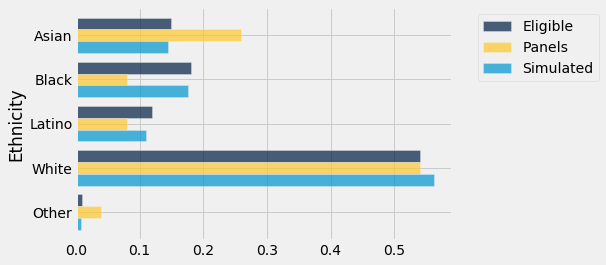

In [8]:
jury_with_simulated.barh("Ethnicity")

In [9]:
jury_with_difference = jury.with_column("Differences", jury.column('Panels') - jury.column('Eligible'))
jury_with_difference

Ethnicity,Eligible,Panels,Differences
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


In [11]:
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

In [12]:
# Observed TVD
tvd(jury.column("Eligible"), jury.column("Panels"))

0.14

In [ ]:
# One simulated TVD

In [14]:
def simulated_tvd():
    sim_prop = sample_proportions(1423, model)
    return tvd(sim_prop, model)

In [15]:
simulated_tvd()

0.014511595221363334

In [16]:
tvds = make_array()
for i in np.arange(10000):
    one_result = simulated_tvd()
    tvds = np.append(tvds, one_result)

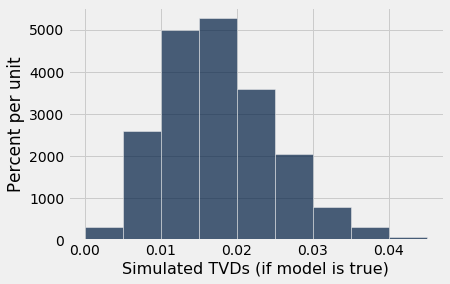

In [17]:
Table().with_column('Simulated TVDs (if model is true)', tvds).hist(bins = np.arange(0, .05, .005))

## Roulette Example##

In [18]:
# Proportion red, black, green on roulette wheel
model = make_array(18/38, 18/38, 2/38)
model

array([0.47368421, 0.47368421, 0.05263158])

In [19]:
# Actual proportions I saw
actual = make_array(25/38, 11/38, 2/38)

In [20]:
# Observed Value of Test Statistic
observed_stat = tvd(actual, model)
observed_stat

0.1842105263157895

In [21]:
def sim_tvd():
    sim_prop = sample_proportions(38, model)
    return tvd(sim_prop, model)

In [22]:
# Simulate Test Statistics Under the Null
tvds = make_array()
repetitions = 10000
for i in np.arange(repetitions):
    new_tvd = sim_tvd()
    tvds = np.append(tvds, new_tvd) 

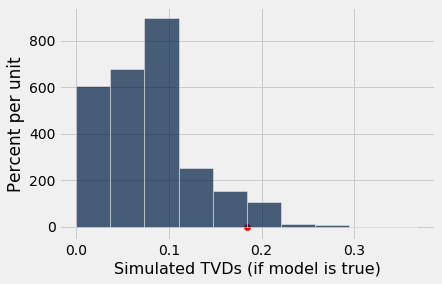

In [23]:
Table().with_column('Simulated TVDs (if model is true)', tvds).hist()
plots.scatter(observed_stat, 0, color = 'red', s=40);

In [24]:
# Calculate the Pvalue and make conclusion
np.count_nonzero(tvds >= observed_stat)/len(tvds)

0.0389